### Подключение модулей

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import tensorflow as tf
from tensorflow import keras

Целью этого проекта является прогнозирование и анализ цен продажи жилья в США. Требуется построить регрессионную модель для прогнозирования цен на жилье в США на основе различных факторов.


### Загрузка данных

In [5]:
df = pd.read_csv('USA_Housing.csv')

In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Данные содержат следующие столбцы:
- __Avg. Area Income__ (Сред. Доход от района): Средний доход жителей города по региону.
- __Avg. Area House Age__ (Сред. Площадь дома): Средний возраст домов в районе.
- __Avg. Area Number of Rooms__ (Сред. Площадь Количество комнат): Среднее количество комнат в домах в том же городе.
- __Avg. Area Number of Bedrooms__ (Сред. Площадь Количество спален): Среднее количество спален в домах в том же городе.
- __Area Population__ (Население региона): Население городского дома, в котором находится.
- __Price__ (Цена): Цена, по которой был продан дом.
- __Address__ (Адрес): Адрес дома.
    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [10]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000
mean,68583.1090,5.9772,6.9878,3.9813,36163.5160,1232072.6541
std,10657.9912,0.9915,1.0058,1.2341,9925.6501,353117.6266
min,17796.6312,2.6443,3.2362,2.0000,172.6107,15938.6579
25%,61480.5624,5.3223,6.2993,3.1400,29403.9287,997577.1350
50%,68804.2864,5.9704,7.0029,4.0500,36199.4067,1232669.3780
75%,75783.3387,6.6508,7.6659,4.4900,42861.2908,1471210.2042
max,107701.7484,9.5191,10.7596,6.5000,69621.7134,2469065.5942


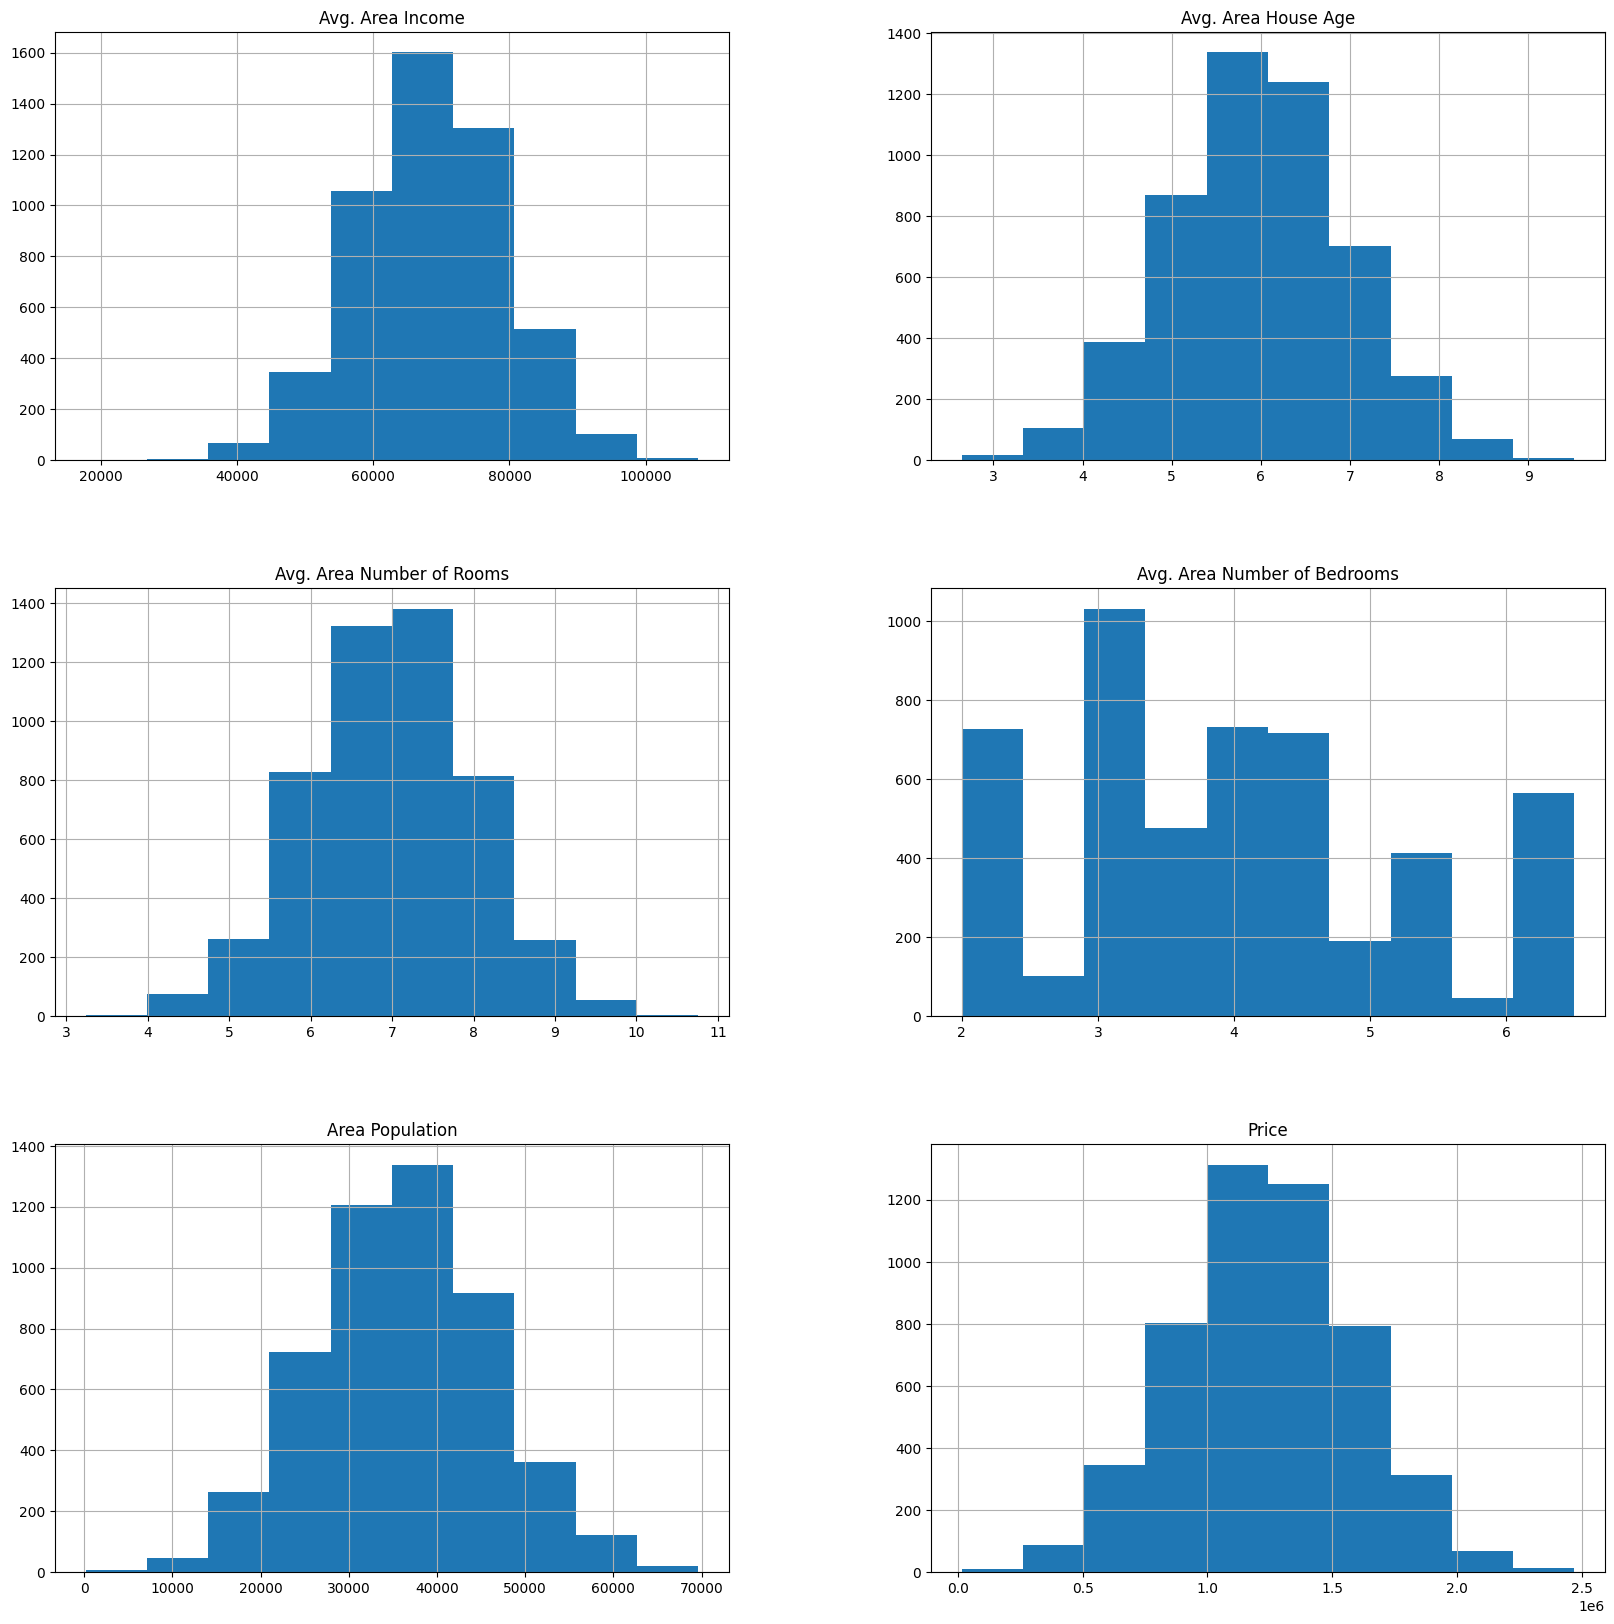

In [11]:
df.hist(figsize=(20,20));

<Figure size 800x600 with 0 Axes>

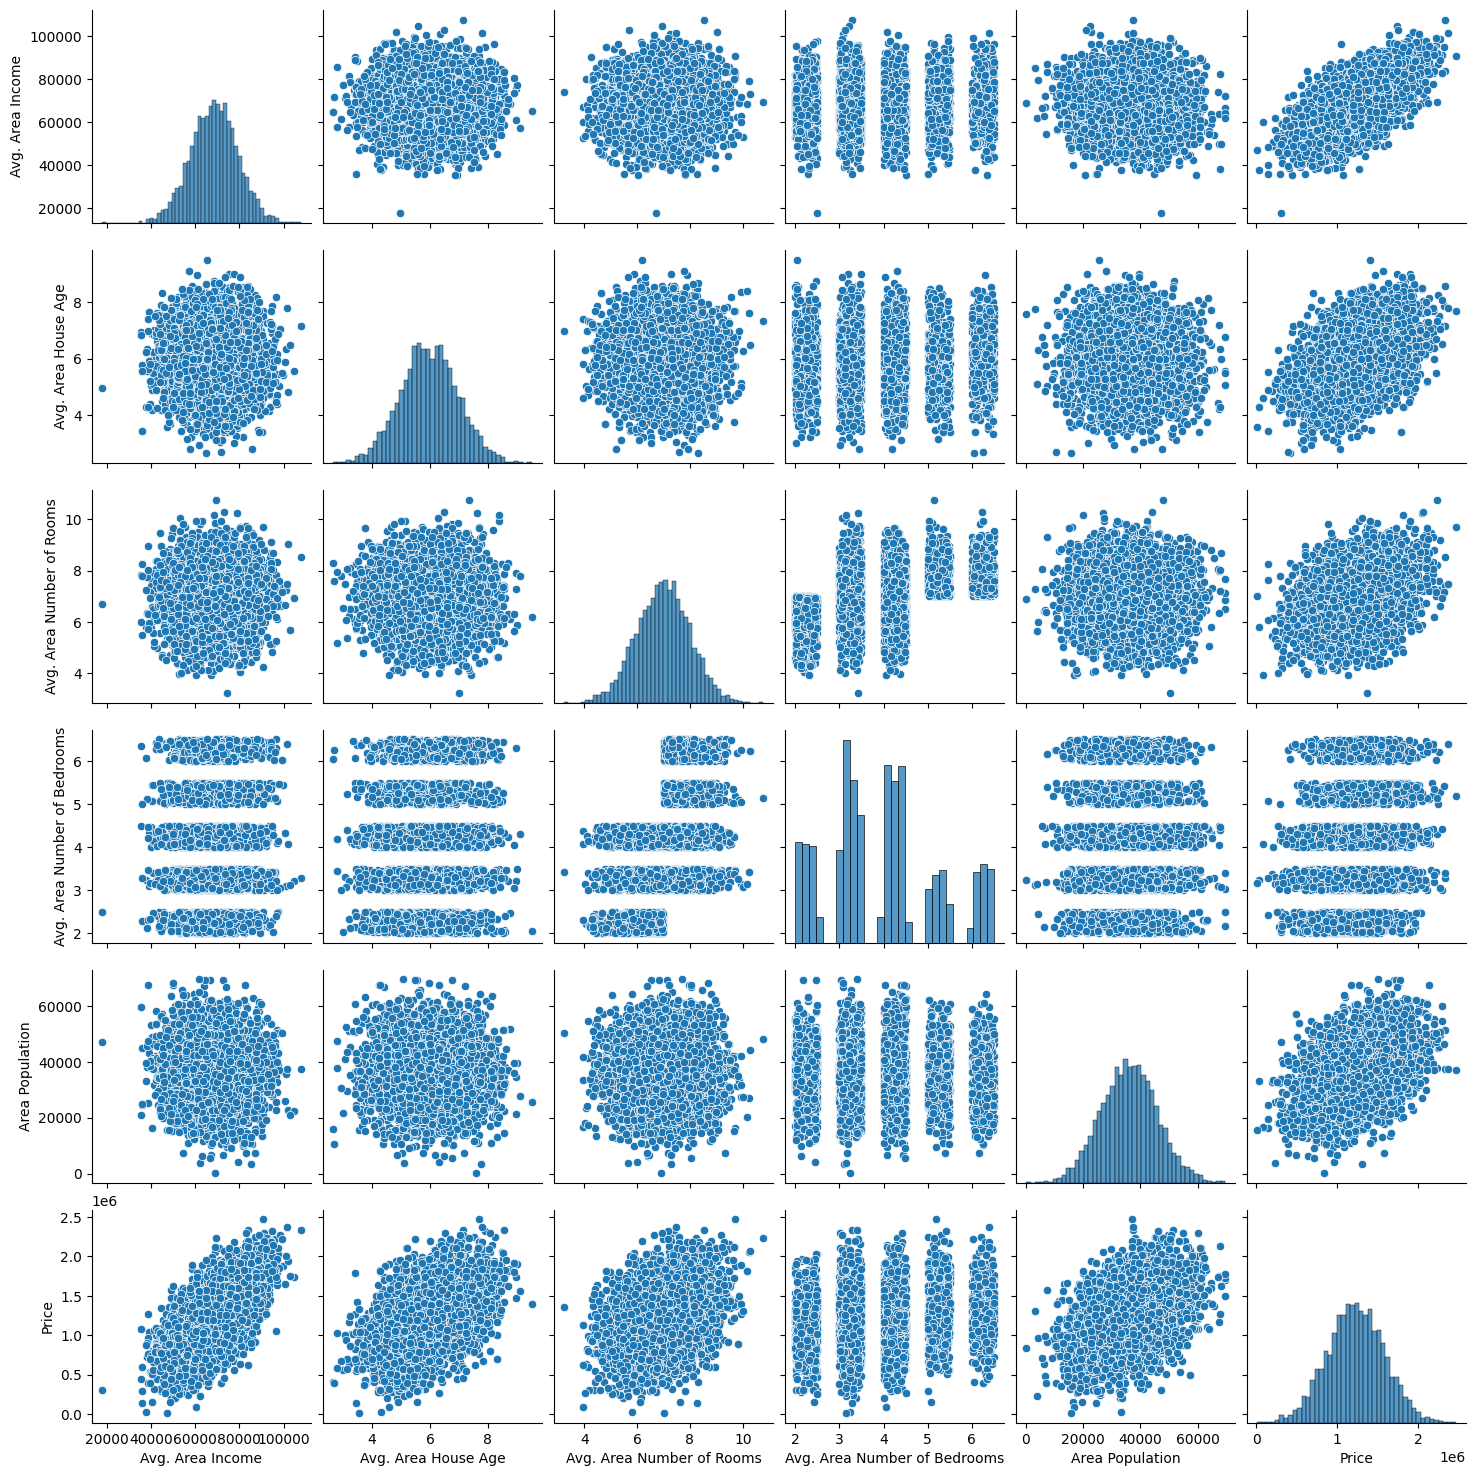

In [12]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

<Axes: xlabel='Price', ylabel='Density'>

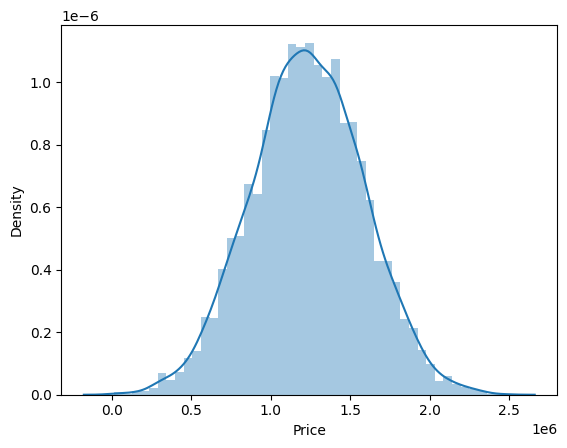

In [13]:
sns.distplot(df['Price'])

<Axes: xlabel='Avg. Area Income', ylabel='Price'>

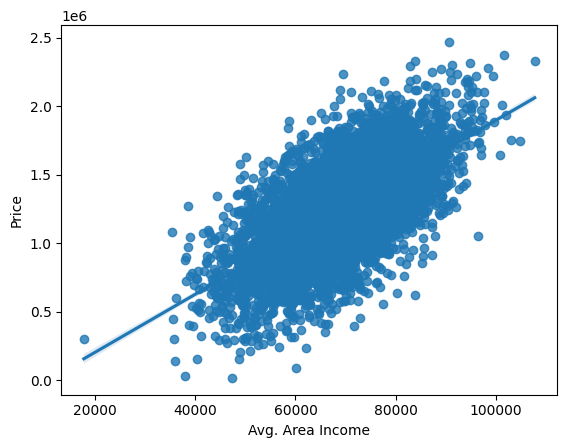

In [14]:
sns.regplot(y='Price', x='Avg. Area Income', data=df)

In [15]:
df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.0000,-0.0020,-0.0110,0.0198,-0.0162,0.6397
Avg. Area House Age,-0.0020,1.0000,-0.0094,0.0061,-0.0187,0.4525
Avg. Area Number of Rooms,-0.0110,-0.0094,1.0000,0.4627,0.0020,0.3357
Avg. Area Number of Bedrooms,0.0198,0.0061,0.4627,1.0000,-0.0222,0.1711
Area Population,-0.0162,-0.0187,0.0020,-0.0222,1.0000,0.4086
Price,0.6397,0.4525,0.3357,0.1711,0.4086,1.0000


<Axes: >

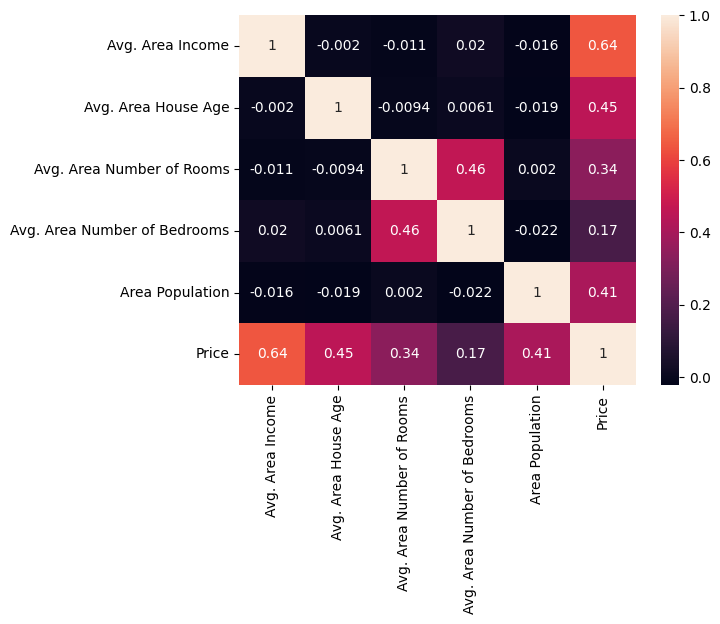

In [16]:
sns.heatmap(df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr(), annot=True)

In [17]:
df['House Age'] = df['Avg. Area House Age'].apply(int)

<Axes: xlabel='House Age', ylabel='Price'>

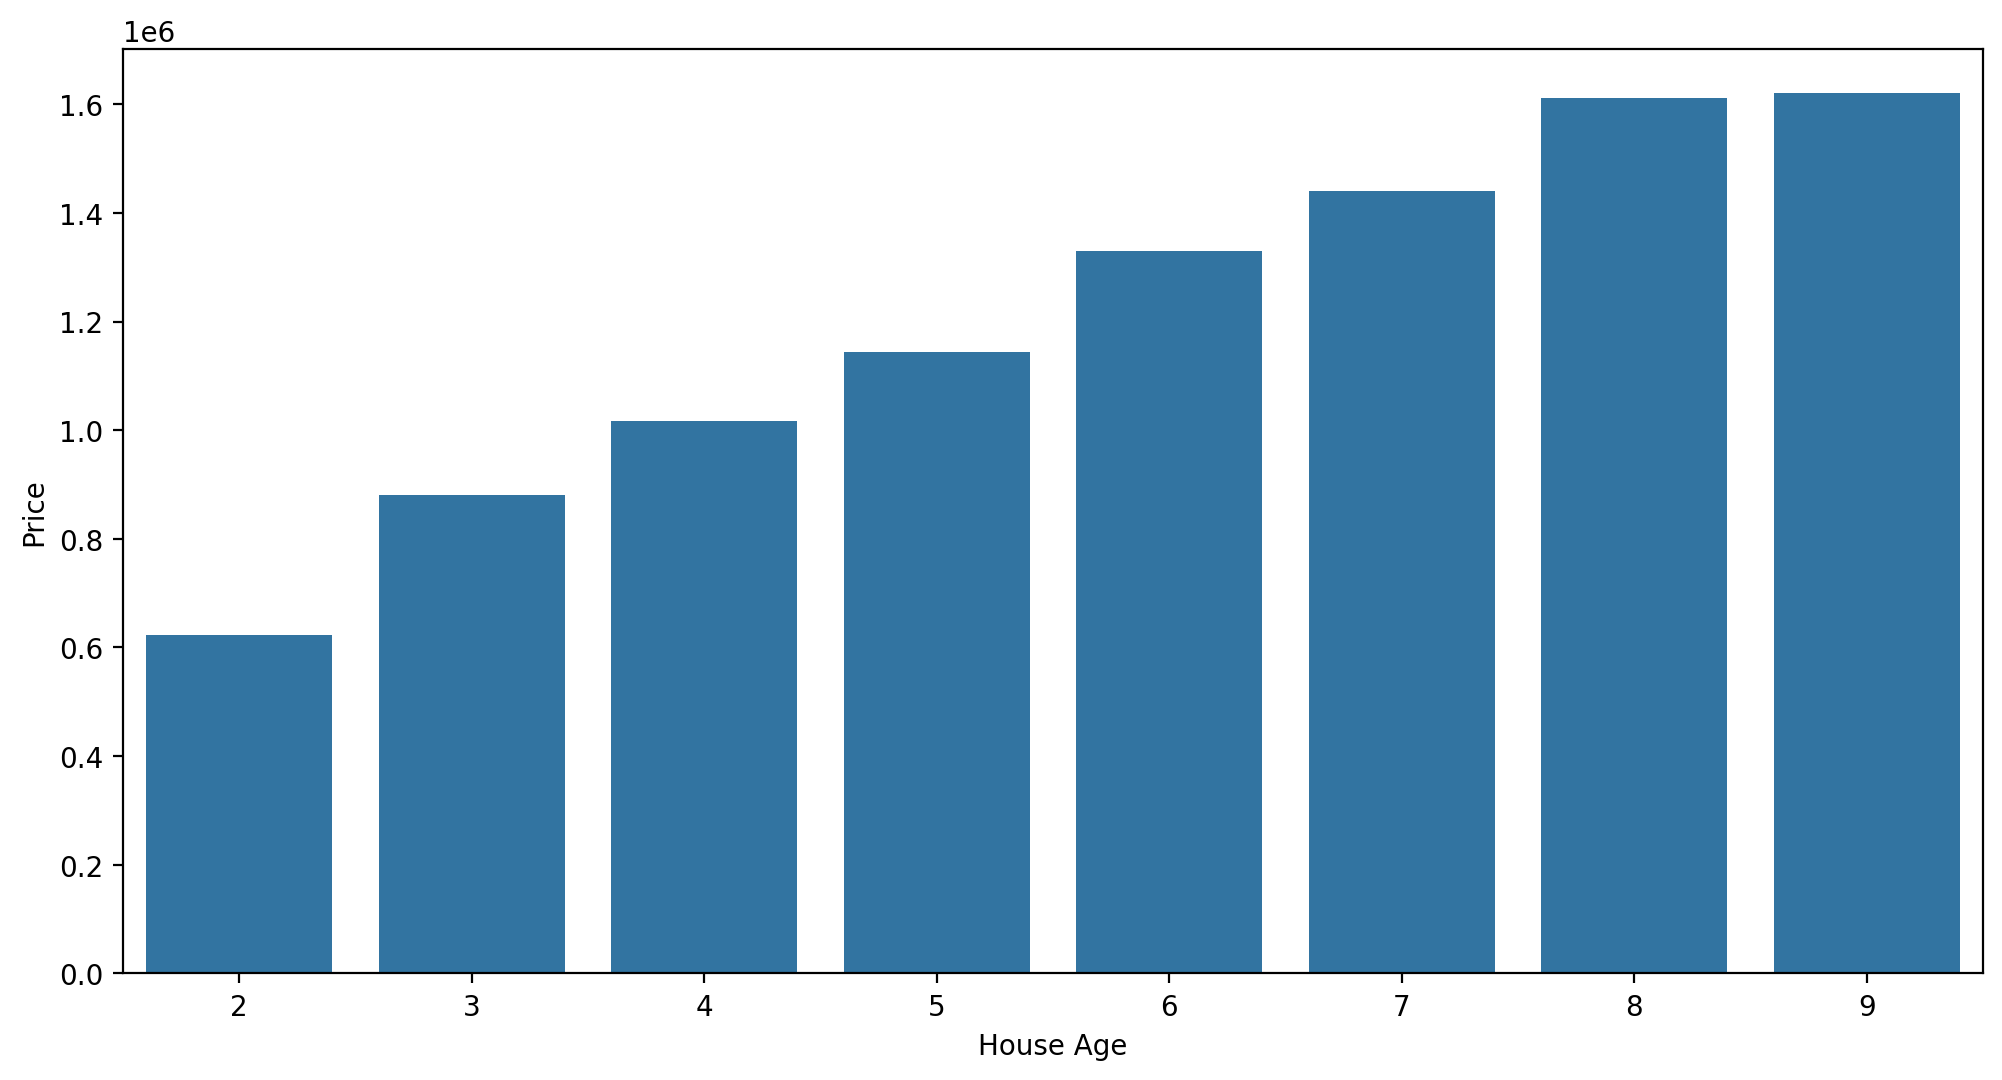

In [18]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'House Age', y = 'Price', data = df, ci = None)

In [19]:
df['Number of Rooms'] = df['Avg. Area Number of Rooms'].apply(int)

<Axes: xlabel='Number of Rooms', ylabel='Price'>

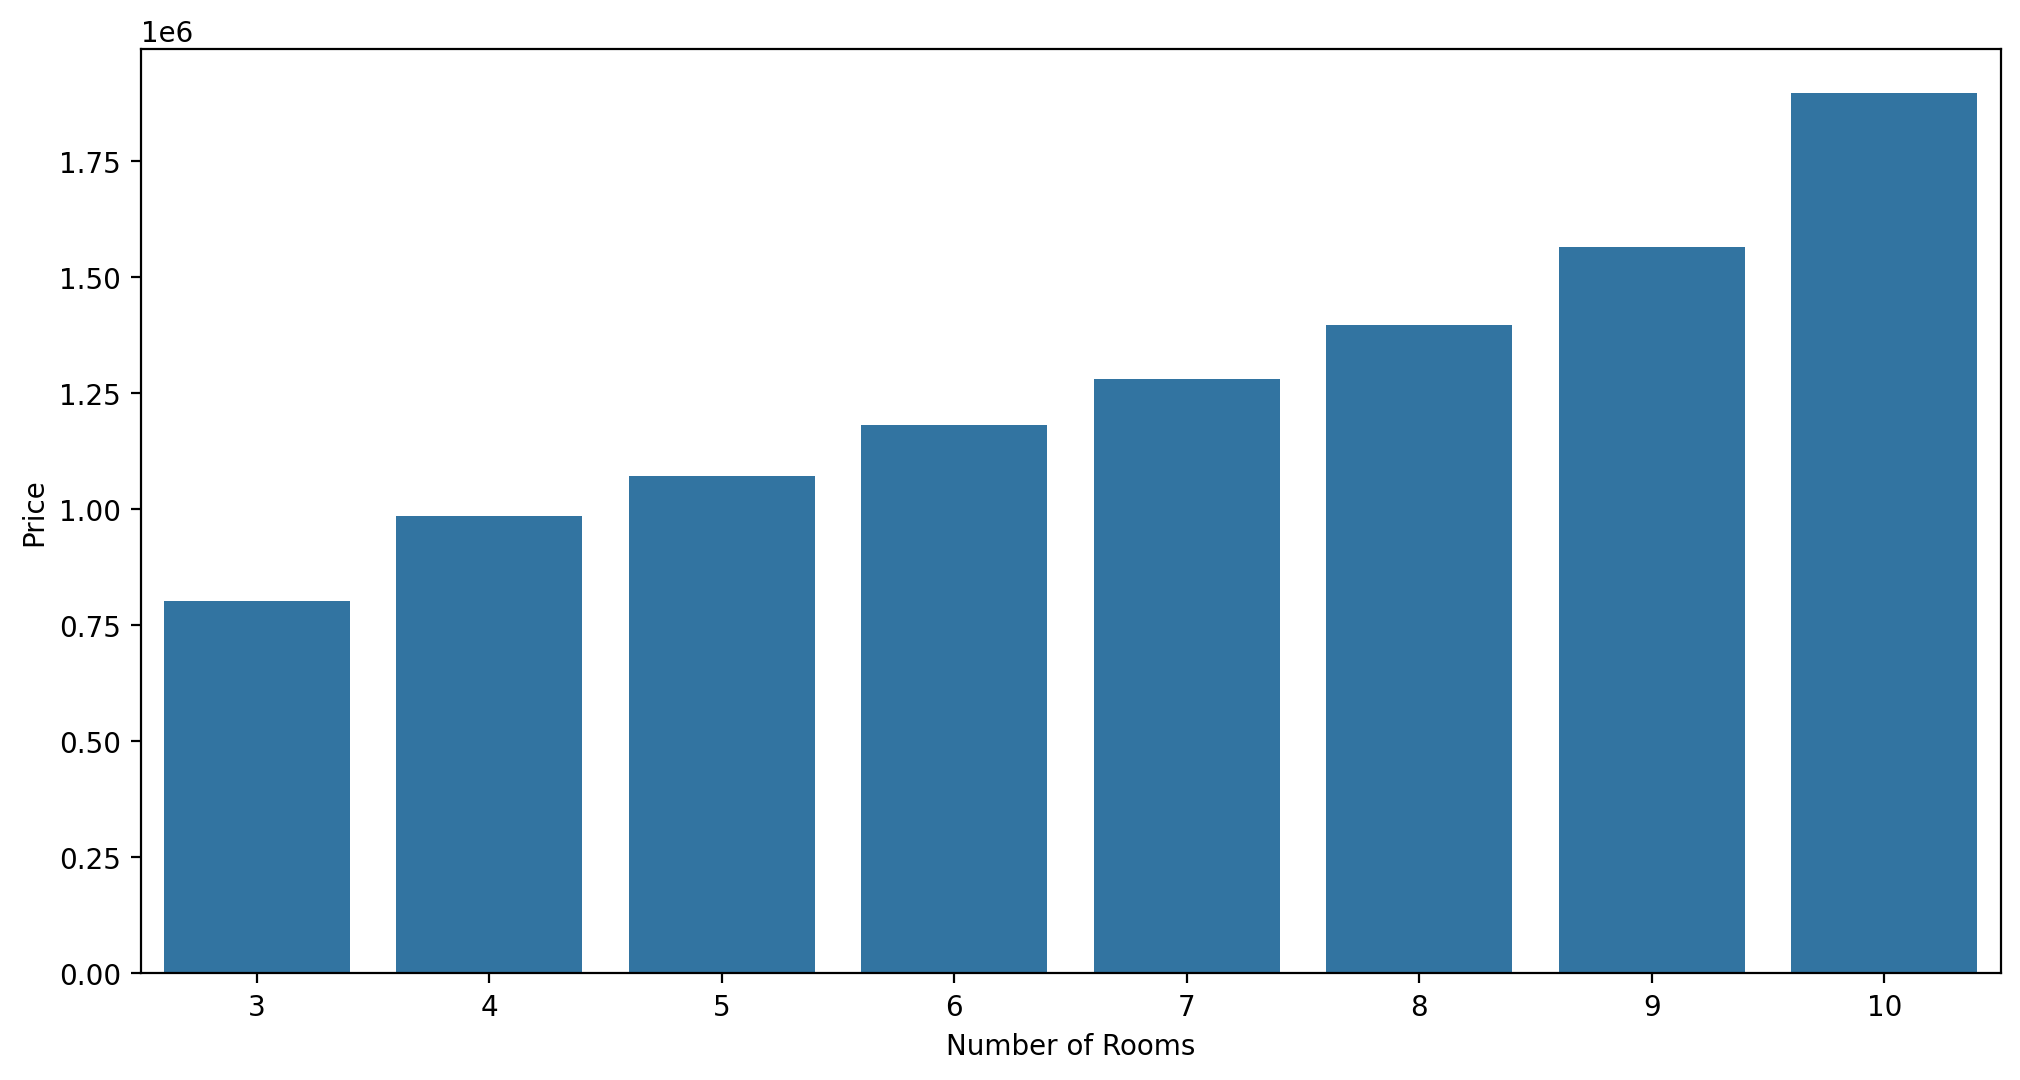

In [20]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Rooms', y = 'Price', data = df, ci = None)

In [21]:
df['Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].apply(int)

<Axes: xlabel='Number of Bedrooms', ylabel='Price'>

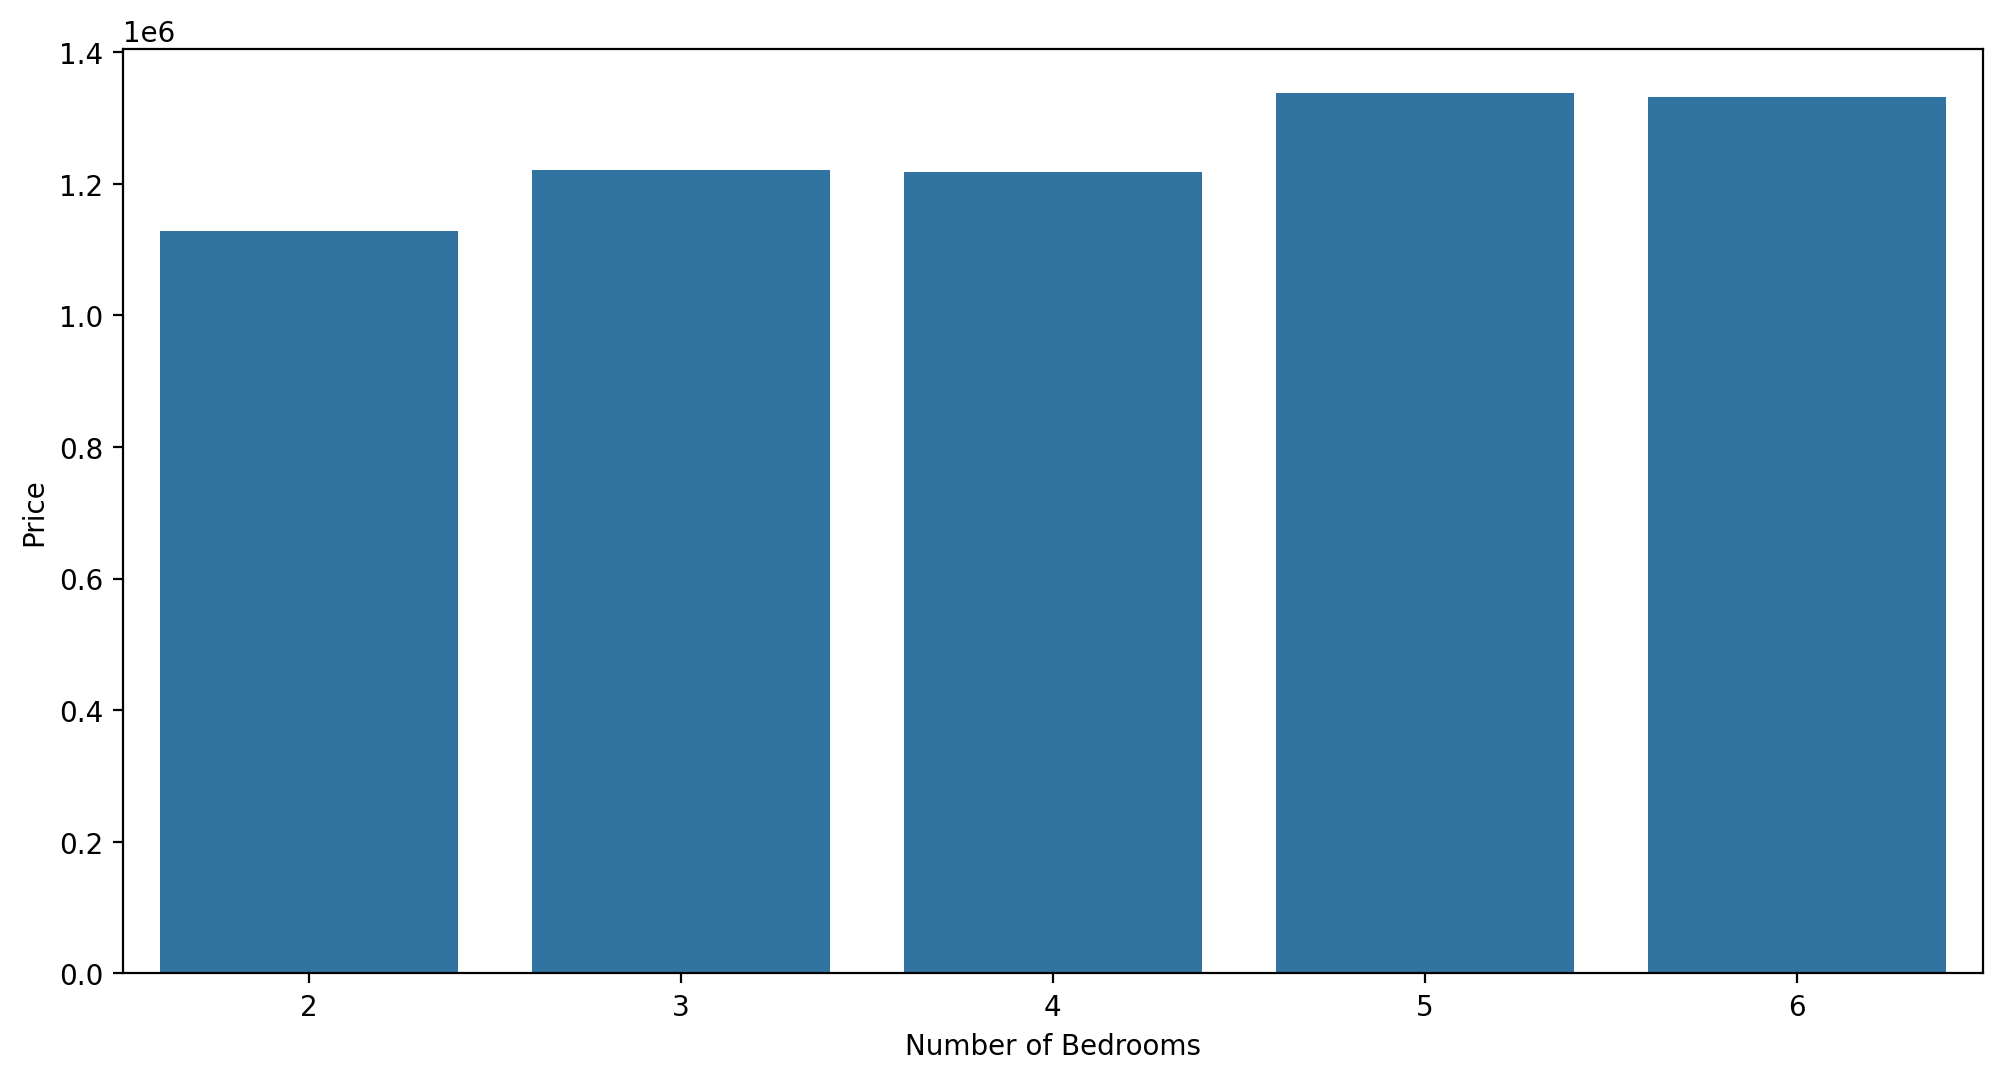

In [22]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Bedrooms', y = 'Price', data = df, ci = None)

### Обучение модели линейной регрессии

In [23]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'House Age', 'Number of Rooms', 'Number of Bedrooms'],
      dtype='object')

In [24]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [25]:
y = df['Price']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Линейная регрессия

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
lrm.intercept_

-2638673.4261914166

In [31]:
lrm.coef_

array([2.16257989e+01, 1.65590393e+05, 1.19827783e+05, 2.36109526e+03,
       1.52165814e+01])

In [32]:
predictions = lrm.predict(X_test)

In [33]:
predictions

array([1308536.13592619, 1237122.72746475, 1243835.62817066, ...,
       1457119.79297241, 1483428.95309368, 1047510.59737176])

In [34]:
y_test.round(3)

1501   1339096.0770
2586   1251794.1790
2653   1340094.9660
1055   1431507.6230
705    1042373.5240
           ...     
3563   1348221.7650
1538   1309937.3990
1837   1472887.2470
2380   1409762.1190
1912   1009606.2840
Name: Price, Length: 1500, dtype: float64

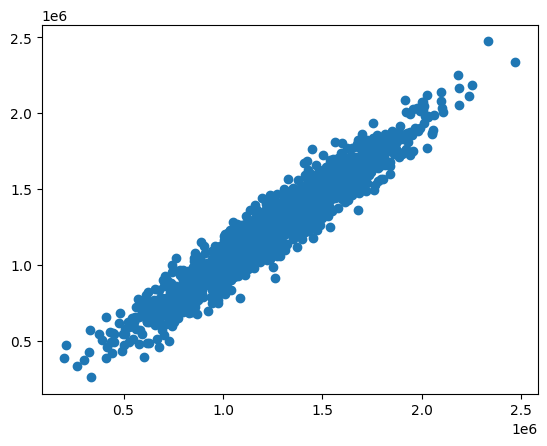

In [35]:
plt.scatter(y_test, predictions)

<Axes: xlabel='Price'>

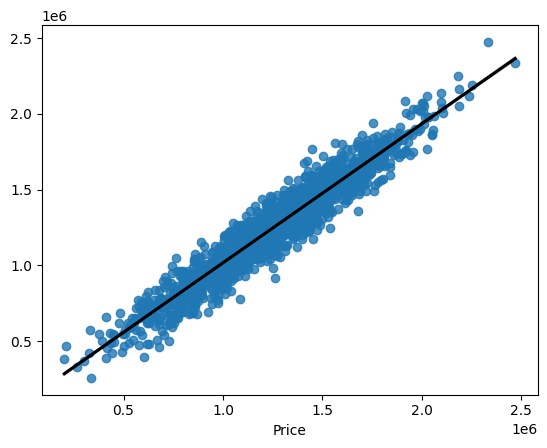

In [36]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"black"})

<Axes: xlabel='Price', ylabel='Density'>

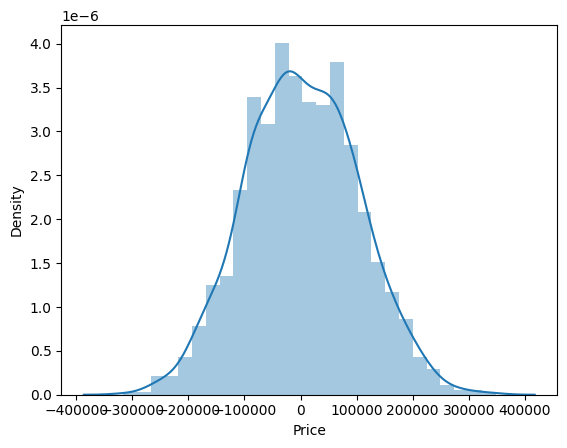

In [37]:
sns.distplot((y_test - predictions))

### Метрики оценки качества регрессии


Общие показатели оценки для задач регрессии:

**Mean Absolute Error** (MAE Средняя абсолютная ошибка) - это среднее значение абсолютного значения ошибок:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE Среднеквадратическая ошибка) - это среднее значение квадратов ошибок:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE Среднеквадратическая ошибка) - это квадратный корень из среднего квадрата ошибок:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Коэффициент детерминации** $R^{2}$

$$R^2 = 1 - \frac{\frac{1}{n}\sum^{n}_{i}{(y - y_{pred})^2}}{\frac{1}{n}\sum^{n}_{i}{(y - \bar{y})^2}}$$

In [38]:
from sklearn import metrics

In [39]:
metrics.mean_absolute_error(y_test, predictions)

81135.56609336905

In [40]:
metrics.mean_squared_error(y_test, predictions)

10068422551.401144

In [41]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

100341.52954485567

In [42]:
metrics.r2_score(y_test, predictions)

0.9146818498753994

In [43]:
predictions

array([1308536.13592619, 1237122.72746475, 1243835.62817066, ...,
       1457119.79297241, 1483428.95309368, 1047510.59737176])

In [44]:
df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.4586,5.6829,7.0092,4.0900,23086.8005
1,79248.6425,6.0029,6.7308,3.0900,40173.0722
2,61287.0672,5.8659,8.5127,5.1300,36882.1594
3,63345.2400,7.1882,5.5867,3.2600,34310.2428
4,59982.1972,5.0406,7.8394,4.2300,26354.1095
...,...,...,...,...,...
4995,60567.9441,7.8304,6.1374,3.4600,22837.3610
4996,78491.2754,6.9991,6.5768,4.0200,25616.1155
4997,63390.6869,7.2506,4.8051,2.1300,33266.1455
4998,68001.3312,5.5344,7.1301,5.4400,42625.6202


In [45]:
df['Price']

0      1059033.5579
1      1505890.9148
2      1058987.9879
3      1260616.8066
4       630943.4893
           ...     
4995   1060193.7859
4996   1482617.7286
4997   1030729.5832
4998   1198656.8724
4999   1298950.4803
Name: Price, Length: 5000, dtype: float64

## Обучение моделей

In [918]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [919]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [920]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score

In [921]:
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(df[['Avg. Area Income', 'Avg. Area House Age', 
                                                                'Avg. Area Number of Rooms', 
                                                                'Avg. Area Number of Bedrooms', 
                                                                'Area Population',
                                                                'House Age',
                                                                'Number of Rooms',
                                                                'Number of Bedrooms']],
                                                                df['Price'],
                                                                test_size=0.3,
                                                                random_state=19)

In [922]:
# class_names = ['Setosa', "Versicolor", "Virginica"]

### Преобработка данных

In [923]:
x_train_n.shape, x_test_n.shape

((3500, 8), (1500, 8))

In [924]:
y_train_n.shape, y_test_n.shape

((3500,), (1500,))

In [925]:
x_train_n.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,House Age,Number of Rooms,Number of Bedrooms
count,3500.0000,3500.0000,3500.0000,3500.0000,3500.0000,3500.0000,3500.0000,3500.0000
mean,68410.5776,5.9721,6.9739,3.9717,36270.8130,5.4766,6.4800,3.7243
std,10565.3674,0.9921,1.0065,1.2315,9916.2020,1.0332,1.0508,1.2227
min,35454.7147,2.6443,3.2362,2.0000,172.6107,2.0000,3.0000,2.0000
25%,61474.2947,5.3223,6.2762,3.1400,29394.2562,5.0000,6.0000,3.0000
50%,68602.4002,5.9778,6.9938,4.0500,36337.8708,5.0000,6.0000,4.0000
75%,75381.5330,6.6354,7.6566,4.4800,43061.7710,6.0000,7.0000,4.0000
max,107701.7484,9.5191,10.7596,6.5000,69621.7134,9.0000,10.0000,6.0000


In [926]:
x_test_n.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,House Age,Number of Rooms,Number of Bedrooms
count,1500.0000,1500.0000,1500.0000,1500.0000,1500.0000,1500.0000,1500.0000,1500.0000
mean,68985.6822,5.9893,7.0202,4.0037,35913.1564,5.4913,6.5207,3.7513
std,10863.9526,0.9902,1.0038,1.2404,9946.4688,1.0366,1.0429,1.2334
min,17796.6312,2.6830,3.9696,2.0000,5727.4859,2.0000,3.0000,2.0000
25%,61504.9681,5.3223,6.3470,3.1500,29462.8064,5.0000,6.0000,3.0000
50%,69272.2755,5.9549,7.0419,4.0300,35792.6756,5.0000,7.0000,4.0000
75%,76295.2979,6.6850,7.6969,5.0100,42468.5988,6.0000,7.0000,5.0000
max,101928.8581,8.9914,9.9261,6.5000,69575.4495,8.0000,9.0000,6.0000


In [927]:
y_train_n

1245   1266209.7532
4411    437436.1382
1489    943309.4486
4036   1422004.0109
2589   1550242.0102
           ...     
1354    324981.9930
1043   1236258.0797
1378   1172133.4868
757    1358646.7463
2670   1443842.0226
Name: Price, Length: 3500, dtype: float64

In [928]:
y_test_n

1401   1043968.3994
10     1707045.7222
753    1197975.0855
4896   1557914.8898
4346    796666.1224
           ...     
1869    885661.5908
3439   1722463.5625
1877   1360787.8712
436    1681316.3623
1305    934111.6355
Name: Price, Length: 1500, dtype: float64

#### Нормализация данных

In [929]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler(feature_range=(0, 1))
mms2 = MinMaxScaler(feature_range=(0, 1))

In [930]:
x_train_nrm = pd.DataFrame(mms.fit_transform(x_train_n), columns=x_train_n.columns)
x_train_nrm.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,House Age,Number of Rooms,Number of Bedrooms
count,3500.0000,3500.0000,3500.0000,3500.0000,3500.0000,3500.0000,3500.0000,3500.0000
mean,0.4562,0.4841,0.4968,0.4382,0.5198,0.4967,0.4971,0.4311
std,0.1462,0.1443,0.1338,0.2737,0.1428,0.1476,0.1501,0.3057
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.3601,0.3895,0.4041,0.2533,0.4208,0.4286,0.4286,0.2500
50%,0.4588,0.4849,0.4995,0.4556,0.5207,0.4286,0.4286,0.5000
75%,0.5526,0.5805,0.5876,0.5511,0.6176,0.5714,0.5714,0.5000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [931]:
x_test_nrm = pd.DataFrame(mms.transform(x_test_n), columns=x_train_n.columns)
x_test_nrm.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,House Age,Number of Rooms,Number of Bedrooms
count,1500.0000,1500.0000,1500.0000,1500.0000,1500.0000,1500.0000,1500.0000,1500.0000
mean,0.4641,0.4866,0.5030,0.4453,0.5146,0.4988,0.5030,0.4378
std,0.1504,0.1440,0.1334,0.2757,0.1432,0.1481,0.1490,0.3083
min,-0.2444,0.0056,0.0975,0.0000,0.0800,0.0000,0.0000,0.0000
25%,0.3606,0.3895,0.4135,0.2556,0.4218,0.4286,0.4286,0.2500
50%,0.4681,0.4816,0.5059,0.4511,0.5129,0.4286,0.5714,0.5000
75%,0.5653,0.5878,0.5929,0.6689,0.6090,0.5714,0.5714,0.7500
max,0.9201,0.9232,0.8892,1.0000,0.9993,0.8571,0.8571,1.0000


In [932]:
y_train_n

1245   1266209.7532
4411    437436.1382
1489    943309.4486
4036   1422004.0109
2589   1550242.0102
           ...     
1354    324981.9930
1043   1236258.0797
1378   1172133.4868
757    1358646.7463
2670   1443842.0226
Name: Price, Length: 3500, dtype: float64

In [933]:
y_test_n

1401   1043968.3994
10     1707045.7222
753    1197975.0855
4896   1557914.8898
4346    796666.1224
           ...     
1869    885661.5908
3439   1722463.5625
1877   1360787.8712
436    1681316.3623
1305    934111.6355
Name: Price, Length: 1500, dtype: float64

In [934]:
y_train_nrm = mms2.fit_transform(y_train_n.values.reshape(-1, 1))
y_train_nrm

array([[0.50966425],
       [0.17182049],
       [0.3780362 ],
       ...,
       [0.47131472],
       [0.54734554],
       [0.5820748 ]])

In [935]:
y_test_nrm = mms2.transform(y_test_n.values.reshape(-1, 1))
y_test_nrm

array([[0.41906912],
       [0.68936794],
       [0.48184886],
       ...,
       [0.54821835],
       [0.67887955],
       [0.37428678]])

### Модель нейронной сети

#### Обучение модели на масштабированых данных

In [936]:
model_v5 = keras.Sequential([keras.layers.Flatten(input_shape=(8,)),
                         keras.layers.Dense(10, activation='relu'),
                         keras.layers.Dense(1)])


#### Настройки модели

In [937]:
model_v5.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss='mse',
    metrics=['mse', 'mae']
)

In [938]:
model_v5.summary()

Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_59 (Flatten)        (None, 8)                 0         
                                                                 
 dense_195 (Dense)           (None, 10)                90        
                                                                 
 dense_196 (Dense)           (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


#### Тренируем модель

In [939]:
# используем итеративный метод для избежания переобучения модели
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [940]:
%%time
hst = model_v5.fit(x_train_nrm, y_train_nrm, epochs=200, validation_data=(x_test_nrm, y_test_nrm), callbacks = [early_stop])
hst

Epoch 1/200
110/110 [==============================] - 1s 3ms/step - loss: 0.0746 - mse: 0.0746 - mae: 0.1884 - val_loss: 0.0255 - val_mse: 0.0255 - val_mae: 0.1288
Epoch 2/200
110/110 [==============================] - 0s 1ms/step - loss: 0.0224 - mse: 0.0224 - mae: 0.1185 - val_loss: 0.0211 - val_mse: 0.0211 - val_mae: 0.1173
Epoch 3/200
110/110 [==============================] - 0s 1ms/step - loss: 0.0193 - mse: 0.0193 - mae: 0.1101 - val_loss: 0.0189 - val_mse: 0.0189 - val_mae: 0.1110
Epoch 4/200
110/110 [==============================] - 0s 1ms/step - loss: 0.0174 - mse: 0.0174 - mae: 0.1045 - val_loss: 0.0170 - val_mse: 0.0170 - val_mae: 0.1054
Epoch 5/200
110/110 [==============================] - 0s 1ms/step - loss: 0.0159 - mse: 0.0159 - mae: 0.1000 - val_loss: 0.0156 - val_mse: 0.0156 - val_mae: 0.1009
Epoch 6/200
110/110 [==============================] - 0s 1ms/step - loss: 0.0146 - mse: 0.0146 - mae: 0.0959 - val_loss: 0.0144 - val_mse: 0.0144 - val_mae: 0.0969
Epoch 7/20

#### Проверяем точность

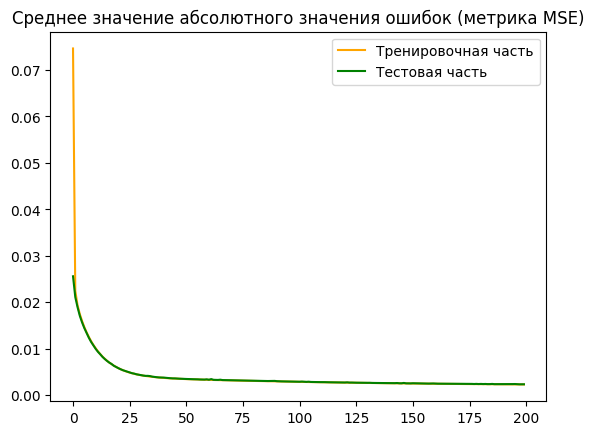

<Figure size 640x480 with 0 Axes>

In [941]:
acc = hst.history['mse']
val_acc = hst.history['val_mse']
loss = hst.history['loss']
val_loss = hst.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'orange', label='Тренировочная часть')
plt.plot(epochs, val_acc, 'green', label='Тестовая часть')
plt.title('Среднее значение абсолютного значения ошибок (метрика MSE)')
plt.legend(loc=0)
plt.figure()


plt.show()

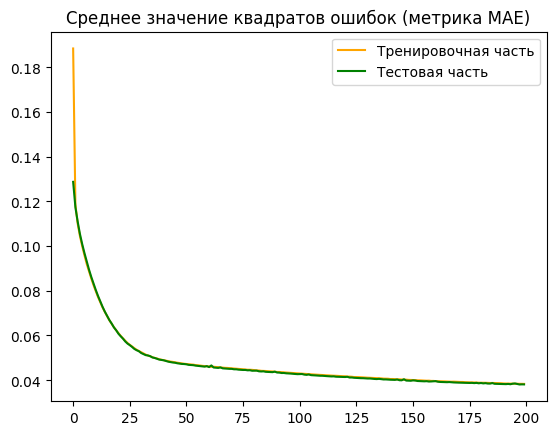

<Figure size 640x480 with 0 Axes>

In [942]:
acc = hst.history['mae']
val_acc = hst.history['val_mae']
loss = hst.history['loss']
val_loss = hst.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'orange', label='Тренировочная часть')
plt.plot(epochs, val_acc, 'green', label='Тестовая часть')
plt.title('Среднее значение квадратов ошибок (метрика MAE)')
plt.legend(loc=0)
plt.figure()


plt.show()

In [950]:
predictions_v5 = model_v5.predict(x_test_nrm)

In [951]:
predictions_v5

array([[0.3711139 ],
       [0.75869405],
       [0.36340714],
       ...,
       [0.55327475],
       [0.6019732 ],
       [0.41776735]], dtype=float32)

In [952]:
y_test_nrm.round(3)

array([[0.419],
       [0.689],
       [0.482],
       ...,
       [0.548],
       [0.679],
       [0.374]])

<Axes: >

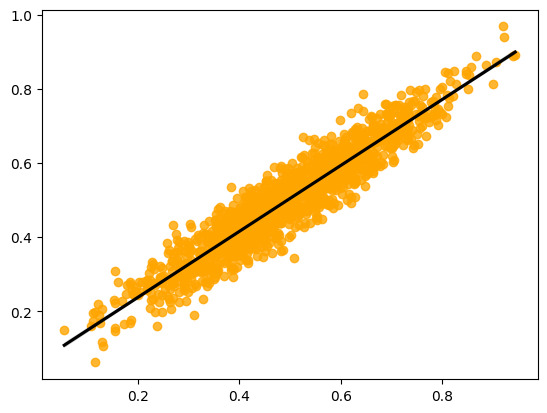

In [960]:
sns.regplot(x=y_test_nrm, y=predictions_v5, color='orange', line_kws={"color":"black"})

<Axes: ylabel='Density'>

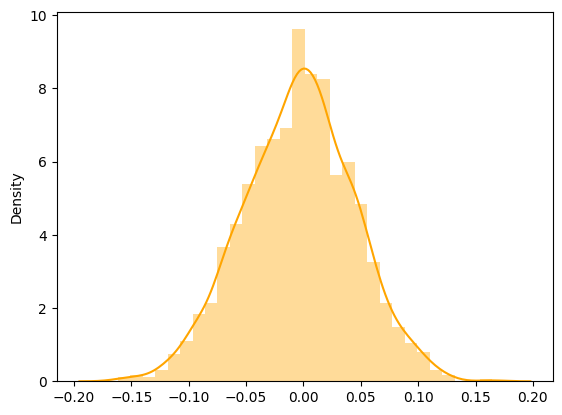

In [961]:
sns.distplot((y_test_nrm - predictions_v5), color='orange')

In [1039]:
print('Метрики: \n')
print(f'MAE:      {metrics.mean_absolute_error(y_test_nrm, predictions_v5):.5f}')
print(f'MSE:      {metrics.mean_squared_error(y_test_nrm, predictions_v5):.5f}')
print(f'RMSE:     {np.sqrt(metrics.mean_squared_error(y_test_nrm, predictions_v5)):.5f}')
print(f'R2_score: {metrics.r2_score(y_test_nrm, predictions_v5):.5f}')

Метрики: 

MAE:      0.03811
MSE:      0.00230
RMSE:     0.04801
R2_score: 0.88950


### KNeighborsRegressor

#### Обучение модели на масштабированых данных

In [1028]:
from sklearn.neighbors import KNeighborsRegressor
knn_v1 = KNeighborsRegressor()

In [1030]:
# Обучаем модель на обучающей выборке
knn_v1.fit(x_train_nrm, y_train_nrm)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [1031]:
knn_pred_test = knn_v1.predict(x_test_nrm)
knn_pred_test

array([[0.45634634],
       [0.65753105],
       [0.39996247],
       ...,
       [0.54087611],
       [0.62866228],
       [0.39399013]])

In [1032]:
knn_pred_train = knn_v1.predict(x_train_nrm)
knn_pred_train

array([[0.5196418 ],
       [0.20831047],
       [0.42645806],
       ...,
       [0.45517068],
       [0.51542424],
       [0.54895993]])

<Axes: >

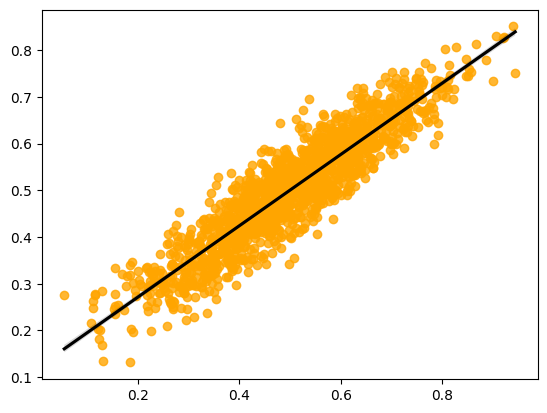

In [1033]:
sns.regplot(x=y_test_nrm, y=knn_pred_test, color='orange', line_kws={"color":"black"})

<Axes: ylabel='Density'>

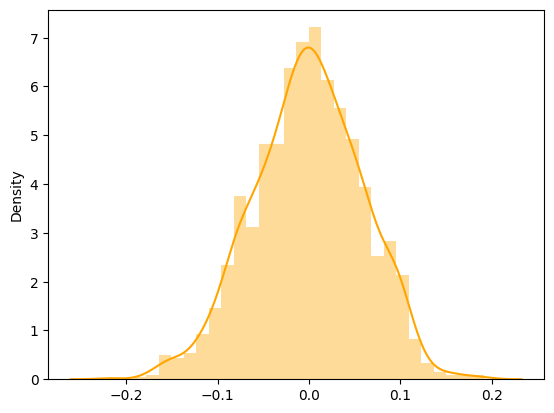

In [1036]:
sns.distplot((y_test_nrm - knn_pred_test), color='orange')

In [1038]:
print('Метрики: \n')
print(f'MAE:      {metrics.mean_absolute_error(y_test_nrm, knn_pred_test):.5f}')
print(f'MSE:      {metrics.mean_squared_error(y_test_nrm, knn_pred_test):.5f}')
print(f'RMSE:     {np.sqrt(metrics.mean_squared_error(y_test_nrm, knn_pred_test)):.5f}')
print(f'R2_score: {metrics.r2_score(y_test_nrm, knn_pred_test):.5f}')

Метрики: 

MAE:      0.04748
MSE:      0.00355
RMSE:     0.05962
R2_score: 0.82957


### Сравнение моделей

In [1041]:
print('Модель нейронной сети: \n')
print(f'MAE:      {metrics.mean_absolute_error(y_test_nrm, predictions_v5):.5f}')
print(f'MSE:      {metrics.mean_squared_error(y_test_nrm, predictions_v5):.5f}')
print(f'RMSE:     {np.sqrt(metrics.mean_squared_error(y_test_nrm, predictions_v5)):.5f}')
print(f'R2_score: {metrics.r2_score(y_test_nrm, predictions_v5):.5f}')
print('-' * 22)

print('KNeighborsRegressor: \n')
print(f'MAE:      {metrics.mean_absolute_error(y_test_nrm, knn_pred_test):.5f}')
print(f'MSE:      {metrics.mean_squared_error(y_test_nrm, knn_pred_test):.5f}')
print(f'RMSE:     {np.sqrt(metrics.mean_squared_error(y_test_nrm, knn_pred_test)):.5f}')
print(f'R2_score: {metrics.r2_score(y_test_nrm, knn_pred_test):.5f}')
print('-' * 22)

Модель нейронной сети: 

MAE:      0.03811
MSE:      0.00230
RMSE:     0.04801
R2_score: 0.88950
----------------------
KNeighborsRegressor: 

MAE:      0.04748
MSE:      0.00355
RMSE:     0.05962
R2_score: 0.82957
----------------------


### Вывод
Для работы был использован датасет **«USA_Housing» (Жилье США)**. Для обучения моделей были выбраны несколько характеристик: 
* Сред. доход от района
* Сред. площадь дома
* Сред. площадь количество комнат
* Сред. площадь количество спален 
* Население региона
* Возраст дома
* Количество комнат
* Количество спален

Выборка состоит из 5000 записей, целевая переменная - **Price (Цена дома)** \
Перед обучением моделей было проведено масштабирование данных, для более стабильного обучения моделей. \
В качестве масштабирования была выбрана нормализация. \
На основе нормализованной выборки было построено 2 модели машинного обучения:
* **Модель нейронной сети**
* **KNeighborsRegressor** 

Для **Модели нейронной сети** на последнем слое модели для регрессии был использован слой без активации. 
Также для избежания переобучения при обучении модели был использован EarlyStopping.

Обе модели показали неплохие результаты при обучении. \
Средние значения ошибок (метрики MSE и MAE) **Модели нейронной сети**, постепенно уменьшается с количеством эпох. \
И в конце обучения составляют:
* **mae** - **0.0383**
* **mse** - **0.0023**
* **rmse** - **0.048**

Показатель эффективности модели - **R2_score** - **0.89**


Результаты обучения модели **KNeighborsRegressor** составляют:
* **mae** - **0.0475**
* **mse** - **0.0036**
* **rmse** - **0.0596**

Показатель эффективности немного хуже предыдущей модели - **R2_score** - **0.83**

В результате проделанной работы, можно сделать вывод, обе модели обучились достаточно неплохо. \
Модели могут совершать незначительные ошибки, центр распределения ошибок близок к нулю.


Наилучше всего обучилась - **Модель нейронной сети**. Она совершает немного меньше ошибок, чем **KNeighborsRegressor**, и показывает больший коэффициент эффективности модели - **R2_score** - **0.89**